## Practical Task 2

In [1]:
#Importing the relevant modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Import the insurance data

df = pd.read_csv("diabetes_dirty.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


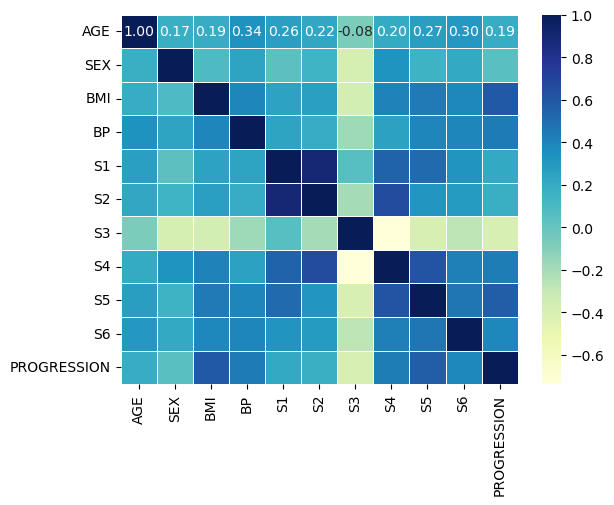

In [5]:
# Plot the distribution of the data
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidth=0.5,fmt=".2f")
plt.show()

Observation: From the heatmap above, we can see that a person's progression depends on S4,S5,BP & BMI

1) S4
2) S5
3) BP
4) BMI


In [7]:
# Dropping the parameters that are not deemed relevant in the analysis
diabetes_df=df.drop(['AGE','SEX','S1','S2','S3','S6'],axis=1)
diabetes_df

,BMI,BP,S4,S5,PROGRESSION
0,32.1,101.00,4.00,4.8598,151
1,21.6,87.00,3.00,3.8918,75
2,30.5,93.00,4.00,4.6728,141
3,25.3,84.00,5.00,4.8903,206
4,23.0,101.00,4.00,4.2905,135
...,...,...,...,...,...
437,28.2,112.00,4.00,4.9836,178
438,24.9,75.00,5.00,4.4427,104
439,24.9,99.67,3.77,4.1271,132
440,30.0,95.00,4.79,5.1299,220


## Multiple Linear Regression

In [11]:
# Storing the independent variables (S4,S5,BP & BMI) in an two dimensional array.
X = diabetes_df.iloc[:,[0,1,2,3]].values
X[0:4]

array([[ 32.1   , 101.    ,   4.    ,   4.8598],
       [ 21.6   ,  87.    ,   3.    ,   3.8918],
       [ 30.5   ,  93.    ,   4.    ,   4.6728],
       [ 25.3   ,  84.    ,   5.    ,   4.8903]])

In [14]:
# Storing the dependent variables (Glucose levels) in an 1 dimensional array
y = diabetes_df.iloc[:,4].values
y = y.reshape(-1, 1)


In [15]:
# Storing the independent variables into a 1 dimensional array
X = X.reshape(-1, X.shape[1])
print(X)

[[ 32.1    101.       4.       4.8598]
 [ 21.6     87.       3.       3.8918]
 [ 30.5     93.       4.       4.6728]
 ...
 [ 24.9     99.67     3.77     4.1271]
 [ 30.      95.       4.79     5.1299]
 [ 19.6     71.       3.       4.5951]]


In [16]:
# Create an empty linear regression model
diabetes_model = LinearRegression()

# Create the model using fit(X,y)
diabetes_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [-325.77176977]
Coefficients: 
 [[ 6.35668667  0.91051676  2.71696943 45.89254895]]


## Training and test samples

In [17]:
# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (353, 4) (353, 1)
Test data: (89, 4) (89, 1)


c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

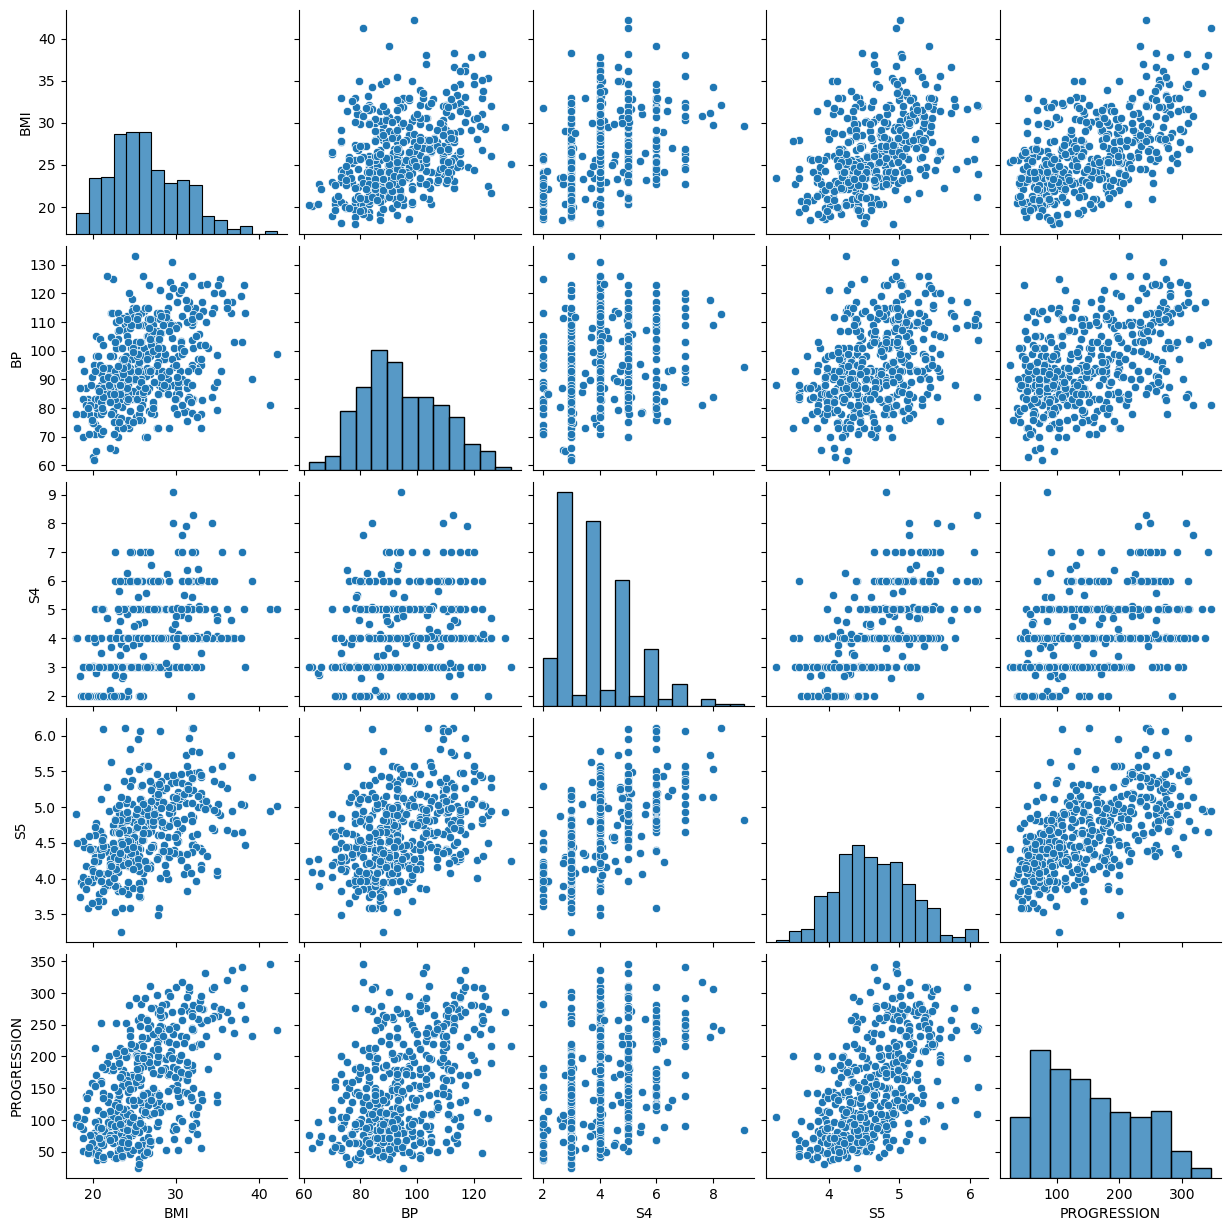

In [18]:
# Plot the distribution of the data
sns.pairplot(data=diabetes_df)

It appears that the features don't follow a Gaussian distribution and therefore we will normalize our data using MinMaxScaler

In [19]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [9.61353072]
Coefficients: 
 [[146.87560798  61.09728607  21.76678659 123.50932111]]


In [51]:
# 1st prediction based on the 1st set of independent variables.
predictions[0]

array([285.33498496])

In [27]:
# Independent variables, but these are scaled.
X_test[0:1]

array([[0.79828326, 0.71830986, 0.41878981, 0.85394869]])

In [53]:
# Transforming the variables back to it pre-scaled format
test=sc.inverse_transform(X_test)

In [55]:
# Printing the first 4 predicted results.
for i in range(0,4):
    print(f"The predicted value of a person with a BMI:{test[i,0]}, BP:{test[i,1]}, S4:{test[i,2]}, S5:{test[i,3]}, is:{predictions[i]}")

The predicted value of a person with a BMI:36.6, BP:113.0, S4:4.63, S5:5.7301, is:[285.33498496]
The predicted value of a person with a BMI:22.5, BP:125.0, S4:2.0, S5:4.4998, is:[138.78075416]
The predicted value of a person with a BMI:25.899999999999995, BP:76.00000000000001, S4:6.0, S5:5.0752, is:[159.45075544]
The predicted value of a person with a BMI:23.4, BP:88.0, S4:3.0, S5:3.2581, is:[56.6520484]


In [48]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))


R2 Score: 0.4529
